In [5]:
import re
import nltk
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [6]:
# Загружаем стоп-слова
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
stop_symb = set(['.', ' '])

# Инициализация инструментов для нормализации текста
segmenter = Segmenter()
morph_vocab = MorphVocab()
morph_analyzer = MorphAnalyzer()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    
    normalized_tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in stop_words and token.lemma not in stop_symb:
            normalized_tokens.append(token.lemma)
    return ' '.join(normalized_tokens)


with open('articles.json', encoding='utf-8') as file:
    file_content = file.read()
    data = json.loads(file_content)


# В список titles запишем заголовки статей
texts = []
for article in data:
    texts.append(article['title'])

print(texts)
print(f'Количество заголовков: {len(texts)}')


normalized_texts = [normalize_text(text) for text in texts]
print(normalized_texts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Glazis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Гормон удовольствия помог лучше обучаться', 'Ученые вызвали жажду кокаина с помощью виртуальной реальности', 'Астрофизики рассказали о «внутренней жизни» кротовых нор', 'В «Росатоме» создали технологию повторной переработки ценных металлов для литийионных аккумуляторов', 'В Пермском Политехе разработали тренажер для специалистов пищевой промышленности', 'Заправка на орбите: ключ к новому космосу', 'На Ближнем Востоке нашли древнюю форму жизни', 'Китайский аппарат «Чанъэ-6» сел на обратной стороне Луны', 'Астрономы предположили, что темная материя дает звездам бессмертие', 'Ученые рассчитали водоснабжение для лунной базы на 100 человек', 'Вакцина от столбняка неожиданно защитила от болезни Паркинсона', 'Найдена новая древнейшая галактика, какой она была через 290 миллионов лет после Большого взрыва', 'Дачная химия: ученые Пермского Политеха рассказали, как безопасно сохранить урожай', 'Психологи выяснили отношение родителей к телесным наказаниям детей в богатых странах', 'Цифровой сер

In [7]:
# Векторизация текста
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(normalized_texts)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
# Сжатие векторов до 2 компонентов
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

In [9]:
# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_pca)

In [10]:
# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_pca)

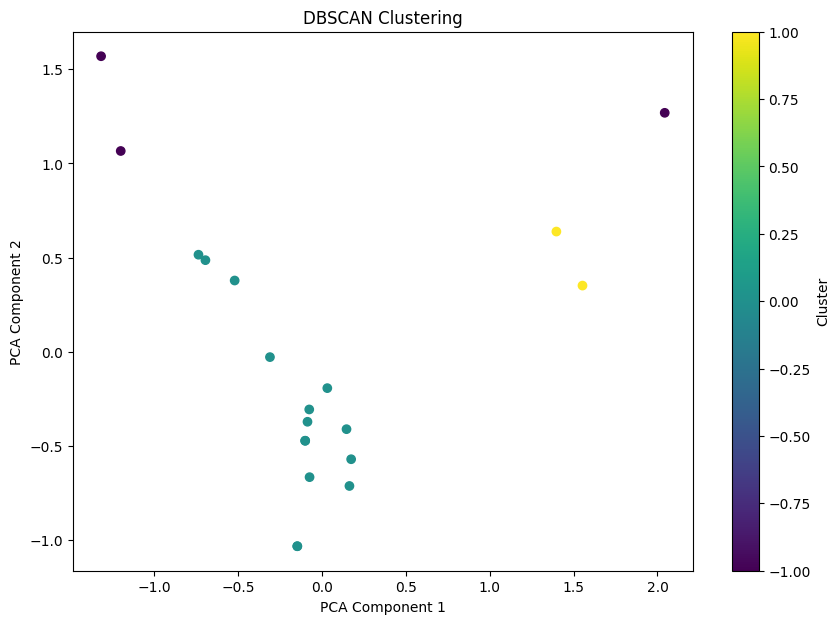

Cluster 0:
['Гормон удовольствия помог лучше обучаться', 'Ученые вызвали жажду кокаина с помощью виртуальной реальности', 'Астрофизики рассказали о «внутренней жизни» кротовых нор', 'В «Росатоме» создали технологию повторной переработки ценных металлов для литийионных аккумуляторов', 'Заправка на орбите: ключ к новому космосу', 'На Ближнем Востоке нашли древнюю форму жизни', 'Китайский аппарат «Чанъэ-6» сел на обратной стороне Луны', 'Астрономы предположили, что темная материя дает звездам бессмертие', 'Ученые рассчитали водоснабжение для лунной базы на 100 человек', 'Вакцина от столбняка неожиданно защитила от болезни Паркинсона', 'Психологи выяснили отношение родителей к телесным наказаниям детей в богатых странах', 'Цифровой сервис упростит разработку искусственных ферментов для промышленности и медицины', 'Мозг во время отдыха не только анализирует прошлое, но и планирует будущее', 'Прием оральных контрацептивов вызвал облысение у части женщин', 'В Зимбабве нашли кости нового вида 

In [11]:
# Визуализация результатов
df = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'cluster': clusters})

plt.figure(figsize=(10, 7))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Выделение тем по кластерам
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    cluster_texts = [texts[i] for i in range(len(clusters)) if clusters[i] == cluster]
    print(cluster_texts)